In [54]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

In [55]:
cancer = datasets.load_breast_cancer()

X = pd.DataFrame(cancer['data'])
X.columns = cancer.feature_names
y = pd.DataFrame(cancer['target'])

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


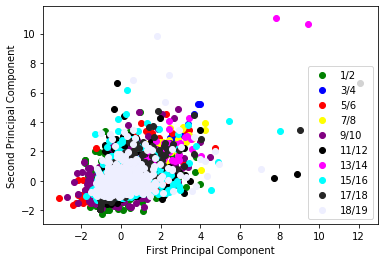

(569, 30)


In [56]:
X_scaled = preprocessing.scale(X)
plt.scatter(X_scaled[:,0] , X_scaled[:,1], c = 'green', label  = '1/2')
plt.scatter(X_scaled[:,2], X_scaled[:,3] , c = 'blue', label = '3/4')
plt.scatter(X_scaled[:,4] , X_scaled[:,5], c = 'red', label  = '5/6')
plt.scatter(X_scaled[:,6], X_scaled[:,7] , c = 'yellow', label = '7/8')
plt.scatter(X_scaled[:,8], X_scaled[:,9] , c = 'purple', label = '9/10')
plt.scatter(X_scaled[:,10], X_scaled[:,11] , c = 'black', label = '11/12')
plt.scatter(X_scaled[:,12], X_scaled[:,13] , c = 'magenta', label = '13/14')
plt.scatter(X_scaled[:,14], X_scaled[:,15] , c = 'cyan', label = '15/16')
plt.scatter(X_scaled[:,16], X_scaled[:,17] , c = '#262626', label = '17/18')
plt.scatter(X_scaled[:,18], X_scaled[:,19] , c = '#eeefff', label = '18/19')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()
print(X_scaled.shape)

In [57]:
pca = PCA(n_components = 0.95)
X_scaled = pca.fit_transform(X_scaled)

print(X_scaled.shape)

(569, 10)


In [58]:
print(X_scaled)

[[ 9.19283683  1.94858307 -1.12316616 ... -0.39840723 -0.15711836
  -0.87740188]
 [ 2.3878018  -3.76817174 -0.52929269 ...  0.24098846 -0.71190482
   1.10699494]
 [ 5.73389628 -1.0751738  -0.55174759 ...  0.09737374  0.02406564
   0.4542754 ]
 ...
 [ 1.25617928 -1.90229671  0.56273053 ...  0.34188704  0.39391682
   0.52087738]
 [10.37479406  1.67201011 -1.87702933 ... -0.28023861 -0.54203454
  -0.08929612]
 [-5.4752433  -0.67063679  1.49044308 ...  1.04635352  0.37410111
  -0.04772557]]


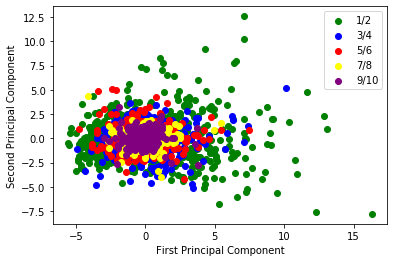

In [59]:
plt.scatter(X_scaled[:,0] , X_scaled[:,1], c = 'green', label  = '1/2')
plt.scatter(X_scaled[:,2], X_scaled[:,3] , c = 'blue', label = '3/4')
plt.scatter(X_scaled[:,4] , X_scaled[:,5], c = 'red', label  = '5/6')
plt.scatter(X_scaled[:,6], X_scaled[:,7] , c = 'yellow', label = '7/8')
plt.scatter(X_scaled[:,8], X_scaled[:,9] , c = 'purple', label = '9/10')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
X_test = preprocessing.scale(X_test)
preds = gnb.predict(X_test)
print(X_scaled.shape)
print(classification_report(preds, y_test))

(569, 10)
              precision    recall  f1-score   support

           0       0.60      0.87      0.71        30
           1       0.94      0.80      0.86        84

    accuracy                           0.82       114
   macro avg       0.77      0.83      0.79       114
weighted avg       0.85      0.82      0.82       114



F:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

gnb = GaussianNB()
X_train = preprocessing.scale(X_train)
gnb.fit(X_train, y_train)
X_test = preprocessing.scale(X_test)
preds = gnb.predict(X_test)
print(classification_report(preds, y_test))
print(X.shape)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        40
           1       0.99      0.95      0.97        74

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

(569, 30)


F:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
